# Week 5 

In [4]:
import torch
from matplotlib import pyplot as plt

### We Used https://app.roboflow.com/ to label the images in YOLO format

In [ ]:
!pip install roboflow



In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="Apbm72sg1skplKy9hE9R")
project = rf.workspace("facetracker").project("facetracker-ybymt")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to facetracker-1 in yolov5pytorch:: 100%|█| 206/2


After importing it is important to move the facetracker folder inside yolov5 folder

## Training the Model 

In [26]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 25 --data ../data.yaml --weights yolov5m.pt

wandb: Currently logged in as: juliosanchez. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.9.0 torch-1.9.1.post3 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.0

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp20/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/juliosanchez/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-7 Python-3.9.0 torch-1.9.1.post3 CPU

Fusing layers... 
Model summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [32]:

results = model('yolov5/facetracker-1/valid/images/distracted-bbcdb6f2-e425-11ec-b20d-4c77cbb36784_jpg.rf.bc6ac86787349d95567d767f3e2682c7.jpg')

In [33]:
import numpy as np

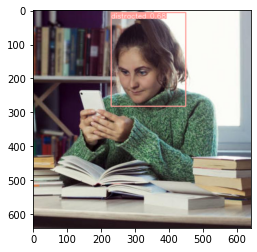

In [34]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()